In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings

In [35]:
# Load dataset
df = pd.read_csv("D:/MLinCB/Assignment-2-MLinCB/data/breast_cancer.csv") #index_col='id'
df['target'] = df['diagnosis'].map({'M': 0, 'B': 1})
df['diagnosis_text'] = df['diagnosis'].map({'M': 'Malignant', 'B': 'Benign'})
df


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target,diagnosis_text
0,1,M,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,...,123.40,1138.0,0.1464,0.1871,0.29140,0.16090,0.3029,0.08216,0,Malignant
1,2,B,11.50,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,...,83.12,508.9,0.1183,0.1049,0.08105,0.06544,0.2740,NaN,1,Benign
2,3,M,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,...,112.00,876.5,0.1131,0.1924,0.23220,0.11190,0.2809,0.06287,0,Malignant
3,4,M,18.82,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.08744,...,145.30,1603.0,0.1390,0.3463,0.39120,0.17080,0.3007,0.08314,0,Malignant
4,5,B,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,...,88.81,585.4,0.1483,NaN,0.22410,0.10560,0.3380,0.09584,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,508,B,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,...,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291,1,Benign
508,509,B,14.20,20.53,92.41,NaN,0.08931,0.11080,0.05063,NaN,...,112.10,828.5,0.1153,0.3429,0.25120,0.13390,0.2534,0.07858,1,Benign
509,510,M,13.86,16.93,90.96,578.9,0.10260,0.15170,NaN,0.05602,...,104.40,750.1,0.1460,0.4370,0.46360,0.16540,0.3630,0.10590,0,Malignant
510,511,M,17.30,17.08,113.00,928.2,0.10080,0.10410,0.12660,0.08353,...,130.90,1222.0,0.1416,0.2405,0.33780,0.18570,0.3138,0.08113,0,Malignant


In [36]:
# Preview the data
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset shape: (512, 34)

Columns: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'target', 'diagnosis_text']

First 5 rows of the dataset:
   id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0   1         M        14.68         20.13           94.74      684.5   
1   2         B        11.50         18.45           73.28      407.4   
2   3         M        15.85         23.95          103.70      782.7   
3   4         M        18.82         21.97        

## Dataset Overview and Descriptive Statistics

In [ ]:
# Check data types and missing values
print("\nData types:")
print(df.dtypes)

print("\nMissing values count:")
print(df.isnull().sum())

print("\nDuplicate rows:", df.duplicated().sum())

# Class distribution
print("\nClass distribution:")
class_dist = df['diagnosis_text'].value_counts()
print(class_dist)
print(f"Class balance: {round(class_dist.min() / class_dist.max() * 100, 2)}%")

# Statistical summary of features
print("\nStatistical summary of numeric features:")
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(df[numeric_cols].describe())


Data types:
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavi

## Handling Missing Values

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if len(missing_values) > 0:
    print("\nColumns with missing values:")
    print(missing_values)
    
    # Demonstration of imputation methods
    print("\nHandling missing values:")
    
    #SimpleImputer from sklearn
    print("\n4. Using SimpleImputer from sklearn:")
    from sklearn.impute import SimpleImputer
    
    numeric_cols_with_missing = [col for col in numeric_cols if col in missing_values.index]
    if numeric_cols_with_missing:
        # Initialize the imputer
        imputer = SimpleImputer(strategy='mean')
        # Fit and transform the data
        df_imputed = df.copy()
        df_imputed[numeric_cols_with_missing] = imputer.fit_transform(df[numeric_cols_with_missing])
        print(f"   Successfully imputed values for columns: {numeric_cols_with_missing}")
        
        # Export sklearn imputed dataset
        df_imputed.to_csv('breast_cancer_sklearn_imputed.csv', index=False)
        print("   Exported to: breast_cancer_sklearn_imputed.csv")
        
    # Use df_imputed for further analysis since it has all missing values filled
    df = df_imputed.copy()
    print("\n   Using sklearn imputed dataset for further analysis")
else:
    print("\nNo missing values found in the dataset.")



Columns with missing values:
radius_mean                 7
texture_mean                5
perimeter_mean              5
area_mean                   4
smoothness_mean             6
compactness_mean            1
concavity_mean             10
concave points_mean         8
symmetry_mean               5
fractal_dimension_mean      3
radius_se                   2
texture_se                  7
perimeter_se                1
area_se                     3
smoothness_se               6
compactness_se              4
concavity_se                2
concave points_se           4
symmetry_se                 5
fractal_dimension_se        5
radius_worst                5
texture_worst               2
perimeter_worst             7
area_worst                  7
smoothness_worst            5
compactness_worst           9
concavity_worst             4
concave points_worst       11
symmetry_worst              3
fractal_dimension_worst     7
dtype: int64

Handling missing values:

4. Using SimpleImputer from sk

## Visualizing Class Distribution

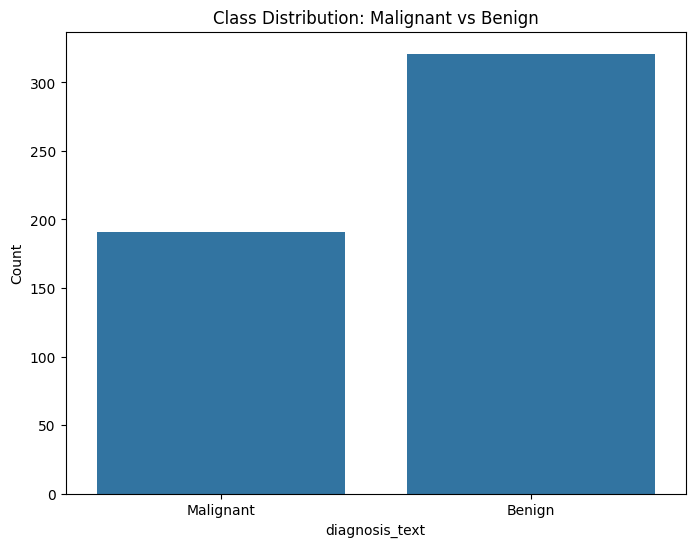

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='diagnosis_text')
plt.title('Class Distribution: Malignant vs Benign')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Exploration of Feature Distributions

C:\Users\USER\AppData\Local\Temp\ipykernel_9596\1086930292.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=6)
C:\Users\USER\AppData\Local\Temp\ipykernel_9596\1086930292.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=6)
C:\Users\USER\AppData\Local\Temp\ipykernel_9596\1086930292.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=6)
C:\Users\USER\AppData\Local\Temp\ipykernel_9596\1086930292.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called

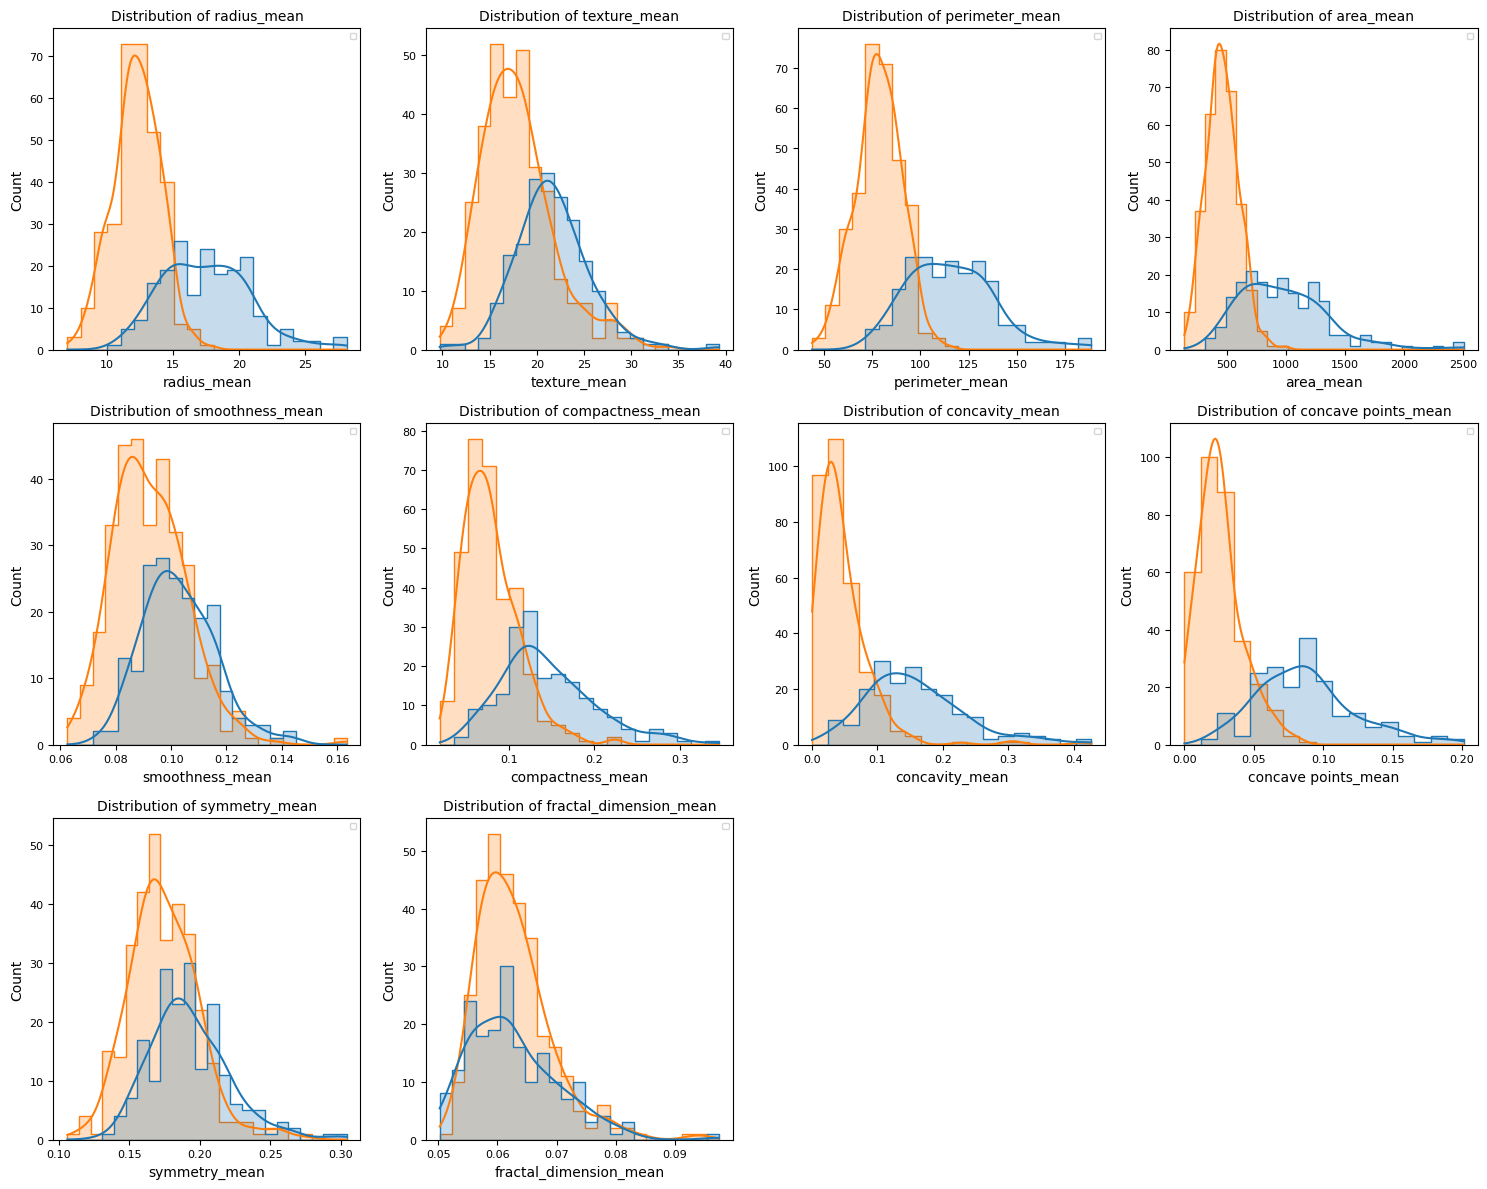

In [ ]:
# Select numeric features excluding id, target and the _se (standard error) features for clearer visualization
mean_features = [col for col in df.columns if '_mean' in col]

# Create histograms for each mean feature
plt.figure(figsize=(15, 12))
for i, feature in enumerate(mean_features):
    plt.subplot(3, 4, i+1)
    sns.histplot(data=df, x=feature, hue='diagnosis_text', kde=True, element='step')
    plt.title(f'Distribution of {feature}', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    #plt.legend(fontsize=6)
plt.tight_layout()
plt.show()

## Box Plots for Outlier Detection

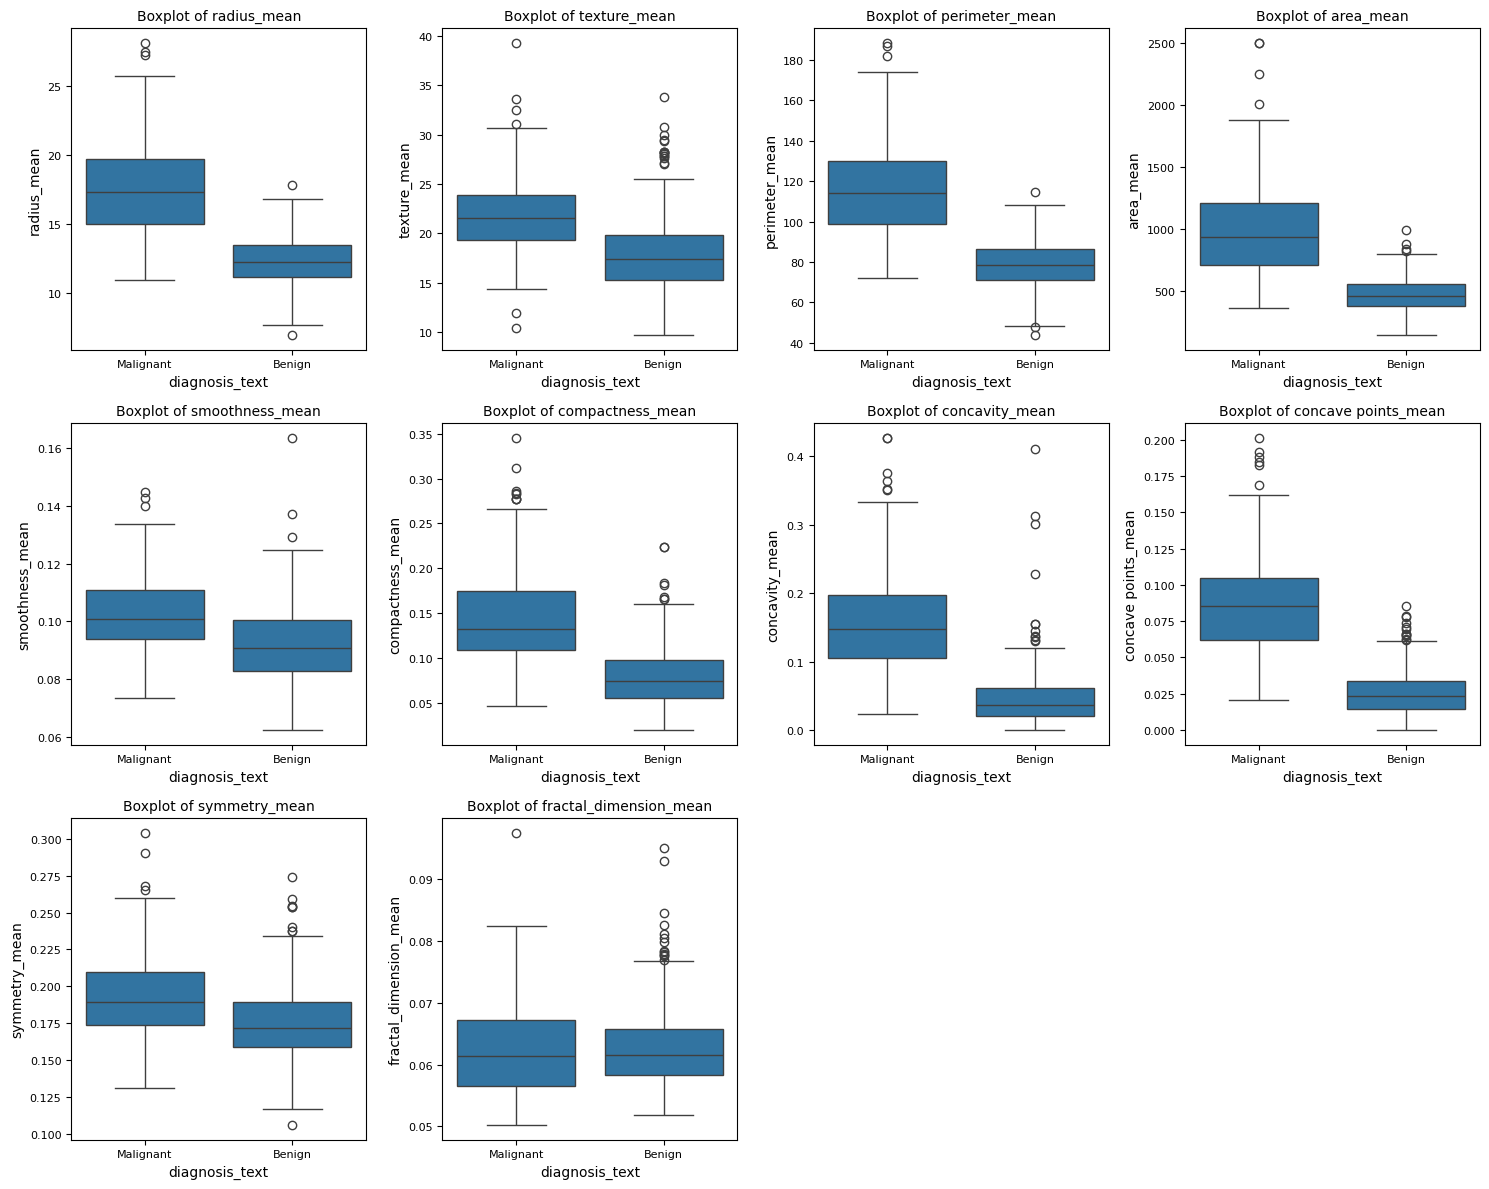


Outliers (using 3 standard deviations):
radius_mean: 5 outliers
texture_mean: 4 outliers
perimeter_mean: 6 outliers
area_mean: 8 outliers
smoothness_mean: 4 outliers
compactness_mean: 9 outliers
concavity_mean: 8 outliers
concave points_mean: 6 outliers
symmetry_mean: 5 outliers
fractal_dimension_mean: 4 outliers
radius_se: 7 outliers
texture_se: 8 outliers
perimeter_se: 8 outliers
area_se: 5 outliers
smoothness_se: 5 outliers
compactness_se: 10 outliers
concavity_se: 6 outliers
concave points_se: 6 outliers
symmetry_se: 10 outliers
fractal_dimension_se: 9 outliers
radius_worst: 5 outliers
texture_worst: 4 outliers
perimeter_worst: 6 outliers
area_worst: 9 outliers
smoothness_worst: 3 outliers
compactness_worst: 8 outliers
concavity_worst: 7 outliers
symmetry_worst: 9 outliers
fractal_dimension_worst: 8 outliers


In [ ]:


# Create a box plot for each mean feature, grouped by diagnosis
plt.figure(figsize=(15, 12))
for i, feature in enumerate(mean_features):
    plt.subplot(3, 4, i+1)
    sns.boxplot(data=df, x='diagnosis_text', y=feature)
    plt.title(f'Boxplot of {feature}', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Check if there are any extreme outliers
def detect_outliers(df, n_std=3):
    """
    Returns a dictionary of features and their corresponding outlier indices
    using the standard deviation method
    """
    outlier_indices = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        # Skip non-feature columns
        if col in ['id', 'target']:
            continue
            
        # Calculate the mean and standard deviation
        mean = df[col].mean()
        std = df[col].std()
        
        # Identify outliers
        outlier_list = df[(df[col] < mean - n_std * std) | (df[col] > mean + n_std * std)].index.tolist()
        if outlier_list:
            outlier_indices[col] = outlier_list
            
    return outlier_indices

outliers = detect_outliers(df)
print("\nOutliers (using 3 standard deviations):")
for feature, indices in outliers.items():
    print(f"{feature}: {len(indices)} outliers")

## Correlation Analysis

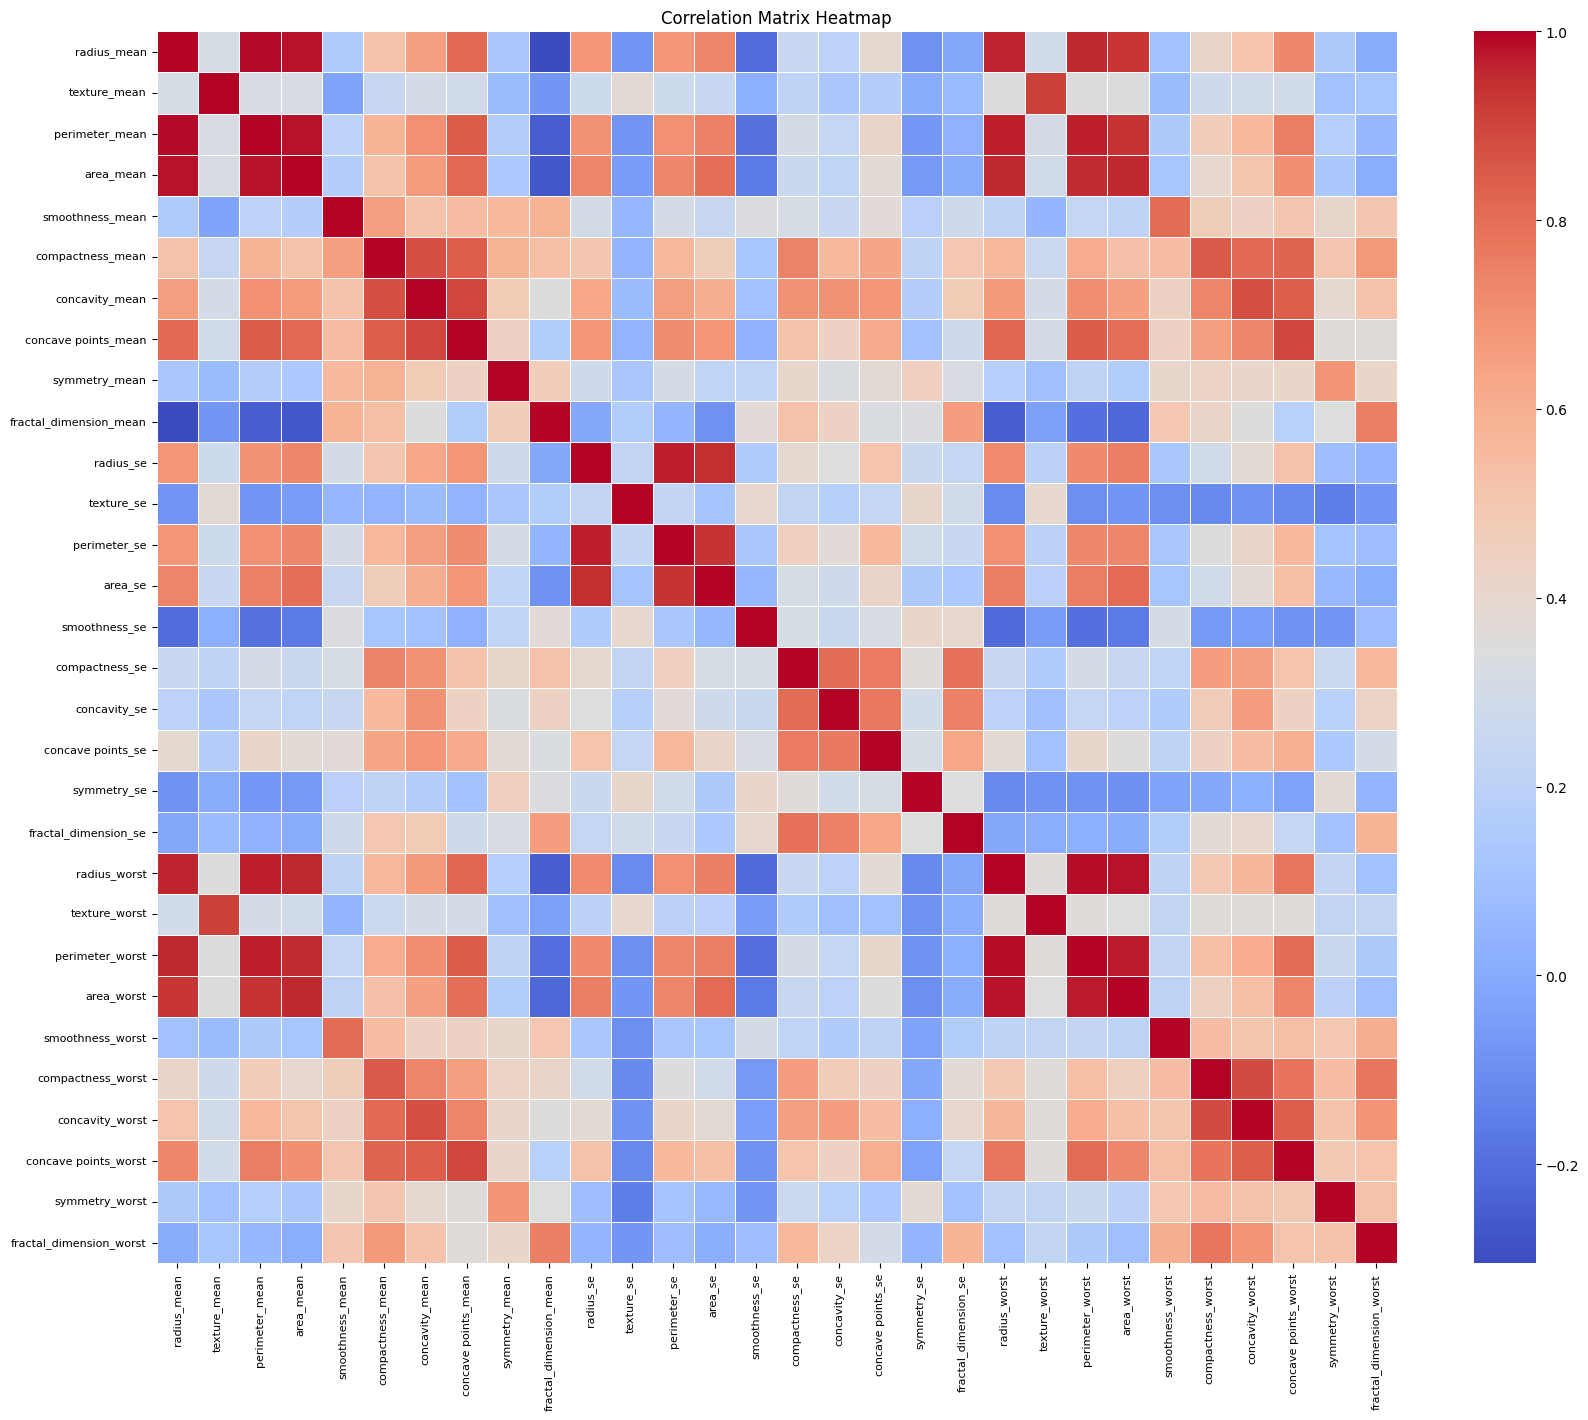


Highly correlated feature pairs (>0.9):
area_se and radius_se: 0.949
perimeter_worst and perimeter_mean: 0.965
texture_worst and texture_mean: 0.913
area_worst and area_mean: 0.955
area_mean and radius_mean: 0.981
area_worst and radius_mean: 0.933
area_mean and perimeter_mean: 0.982
perimeter_worst and radius_worst: 0.989
area_worst and perimeter_worst: 0.971
area_worst and perimeter_mean: 0.936
perimeter_mean and radius_mean: 0.990
radius_worst and area_mean: 0.958
perimeter_worst and area_mean: 0.953
area_worst and radius_worst: 0.980
radius_worst and radius_mean: 0.962
perimeter_worst and radius_mean: 0.956
area_se and perimeter_se: 0.937
perimeter_se and radius_se: 0.969
radius_worst and perimeter_mean: 0.965


In [ ]:
# Calculate the correlation matrix for numeric features
correlation_matrix = df.select_dtypes(include=[np.number]).drop(['id', 'target'], axis=1, errors='ignore').corr()

# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# Identify highly correlated features (above 0.9)
high_corr_threshold = 0.9
high_corr_features = set()
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            featurei = correlation_matrix.columns[i]
            featurej = correlation_matrix.columns[j]
            corr_value = correlation_matrix.loc[featurei, featurej]
            high_corr_features.add((featurei, featurej))
            high_corr_pairs.append((featurei, featurej, corr_value))

print("\nHighly correlated feature pairs (>0.9):")
for feature_pair in high_corr_features:
    print(f"{feature_pair[0]} and {feature_pair[1]}: {correlation_matrix.loc[feature_pair[0], feature_pair[1]]:.3f}")


## Dimensionality Reduction with PCA


Exported standardized dataset to: breast_cancer_standardized.csv
Exported 2-component PCA dataset to: breast_cancer_pca_2components.csv


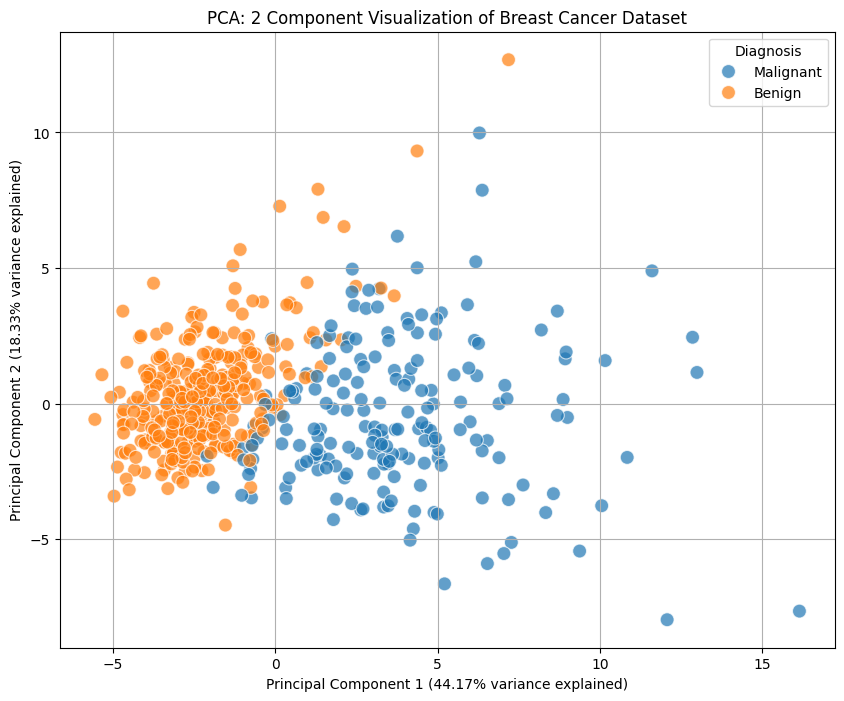

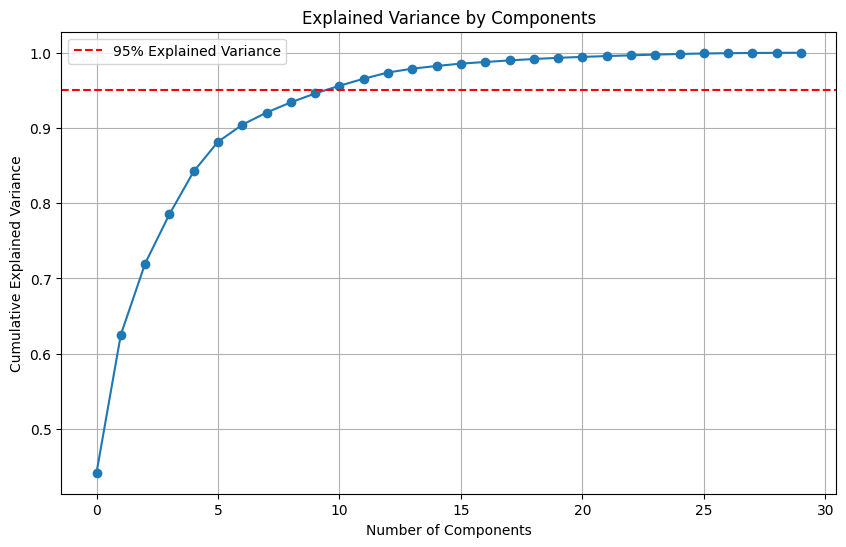


Number of components needed to explain 95% of variance: 11
Exported 11-component PCA dataset to: breast_cancer_pca_11components.csv
Exported PCA components matrix to: breast_cancer_pca_components_matrix.csv


In [ ]:
# Standardize the data (excluding non-feature columns)
features = df.select_dtypes(include=[np.number]).drop(['id', 'target'], axis=1, errors='ignore')
X = features.values
y = df['target'].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with standardized features for export
df_standardized = pd.DataFrame(X_scaled, columns=features.columns)
df_standardized['id'] = df['id']
df_standardized['diagnosis'] = df['diagnosis']
df_standardized['target'] = df['target']
df_standardized['diagnosis_text'] = df['diagnosis_text']

# Export standardized dataset
df_standardized.to_csv('breast_cancer_standardized.csv', index=False)
print("\nExported standardized dataset to: breast_cancer_standardized.csv")

# Apply PCA with 2 components for visualization
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

# Create a dataframe with PCA results
pca_df = pd.DataFrame(data=X_pca_2, columns=['PC1', 'PC2'])
pca_df['id'] = df['id']
pca_df['diagnosis'] = df['diagnosis']
pca_df['diagnosis_text'] = df['diagnosis_text']
pca_df['target'] = df['target']

# Export 2-component PCA dataset
pca_df.to_csv('breast_cancer_pca_2components.csv', index=False)
print("Exported 2-component PCA dataset to: breast_cancer_pca_2components.csv")

# Plot results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='diagnosis_text', s=100, alpha=0.7)
plt.title('PCA: 2 Component Visualization of Breast Cancer Dataset')
plt.xlabel(f'Principal Component 1 ({pca_2.explained_variance_ratio_[0]:.2%} variance explained)')
plt.ylabel(f'Principal Component 2 ({pca_2.explained_variance_ratio_[1]:.2%} variance explained)')
plt.grid(True)
plt.legend(title='Diagnosis')
plt.show()

# Fit PCA without limiting components to get explained variance
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.legend()
plt.show()

# Print how many components are needed to explain 95% of variance
n_components_95 = np.argmax(np.cumsum(pca_full.explained_variance_ratio_) >= 0.95) + 1
print(f"\nNumber of components needed to explain 95% of variance: {n_components_95}")
